In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [2]:
n_features = 50
X_size = 1000
X_test_size = 200
X = torch.rand(X_size, 50)
X_test = torch.rand(X_test_size, 50)

In [3]:
B = torch.rand(50)

In [4]:
Y = X@B + torch.rand(X_size)
Y_test = X_test@B + torch.rand(X_test_size)

In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(50, 10)
        self.l2 = nn.Linear(10, 1)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.tanh(self.l1(x))
        x = self.l2(x)
        return x.squeeze()

In [ ]:
neural_network = NeuralNetwork()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(neural_network.parameters(), lr=0.00005)
n_epochs = 10000  # Number of iterations over the whole dataset

training_losses, testing_losses = [], []

for e in range(n_epochs):
    Y_hat = neural_network(X)
    error = loss_fn(Y_hat, Y)
    error.backward()
    optimizer.step()
    test_error = loss_fn(neural_network(X_test), Y_test)
    training_losses.append(error.item())
    testing_losses.append(test_error.item())

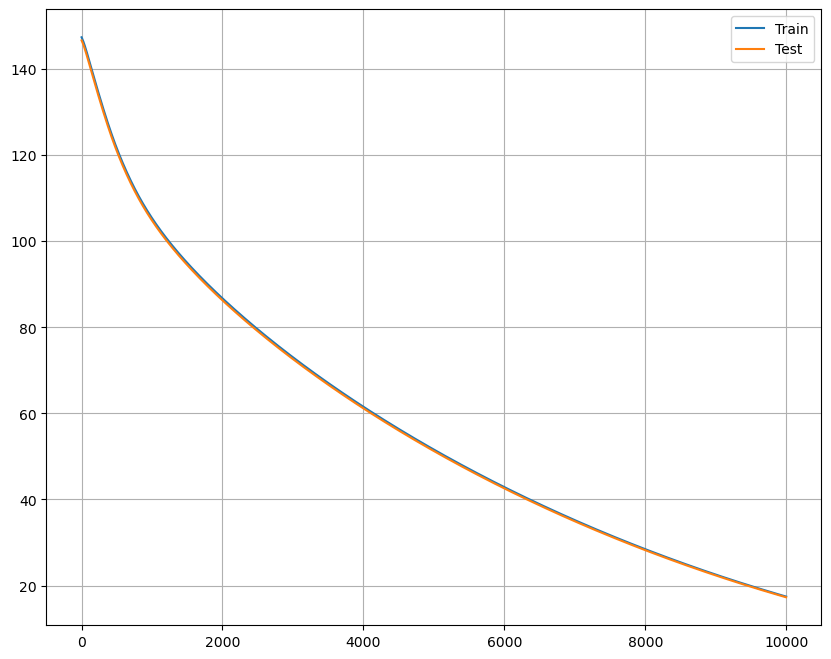

In [7]:
plt.figure(figsize=(10, 8))
plt.plot(training_losses, label="Train")
plt.plot(testing_losses, label="Test")
plt.legend()
plt.grid()
plt.show()